In [1]:
# initial imports

from pathlib import Path # pathlib module provides object-oriented interface for filesystem paths
import pandas as pd 
import tarfile # tarfile module allows for reading and writing of tar files
import urllib.request # urllib.request module is used for opening and reading URLs

<h4><strong>Getting the data</strong></h4>

In [2]:
# this function downloads the California housing dataset if it is not already present and loads it into a pandas DataFrame.
# functions are resuable pieces of code that perform a specific task - if the data was elsewhere, we would simply change the URL in one place

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz") # path to the tarball file
    if not tarball_path.is_file(): # check if the tarball file does not exist
        Path("datasets").mkdir(parents=True, exist_ok=True) # create datasets directory if it doesn't exist
        url = "https://github.com/ageron/data/raw/main/housing.tgz" # URL of the dataset
        urllib.request.urlretrieve(url, tarball_path) # download the tarball
        with tarfile.open(tarball_path) as housing_tarball: # open the tarball
            housing_tarball.extractall(path="datasets") # extract its contents to the datasets directory
    return pd.read_csv(Path("datasets/housing/housing.csv")) # load the CSV file into a pandas DataFrame and return it

# calling the function
housing = load_housing_data()

<h4><strong>Initial review of the data</strong></h4>

In [3]:
housing.head() # display the first few rows of the DataFrame.  The .head() function gives the first five lines of the data set across all atributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info() # display a summary of the DataFrame.  The .info() function provides information about the DataFrame including the number of non-null entries and data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# All data is numeric aside from ocean_proximity, which is categorica and can be viewed in more detail using the following code:

housing["ocean_proximity"].value_counts() # display the counts of unique values in the ocean_proximity column

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe() # display statistical summary of the DataFrame.  The .describe() function provides various summary statistics for numerical columns in the DataFrame    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<h4><strong>Very early visualisation of the data</strong></h4>
This is very light touch ahead of the immediate test / train split

In [7]:
import matplotlib.pyplot as plt # import the matplotlib library for data visualisation

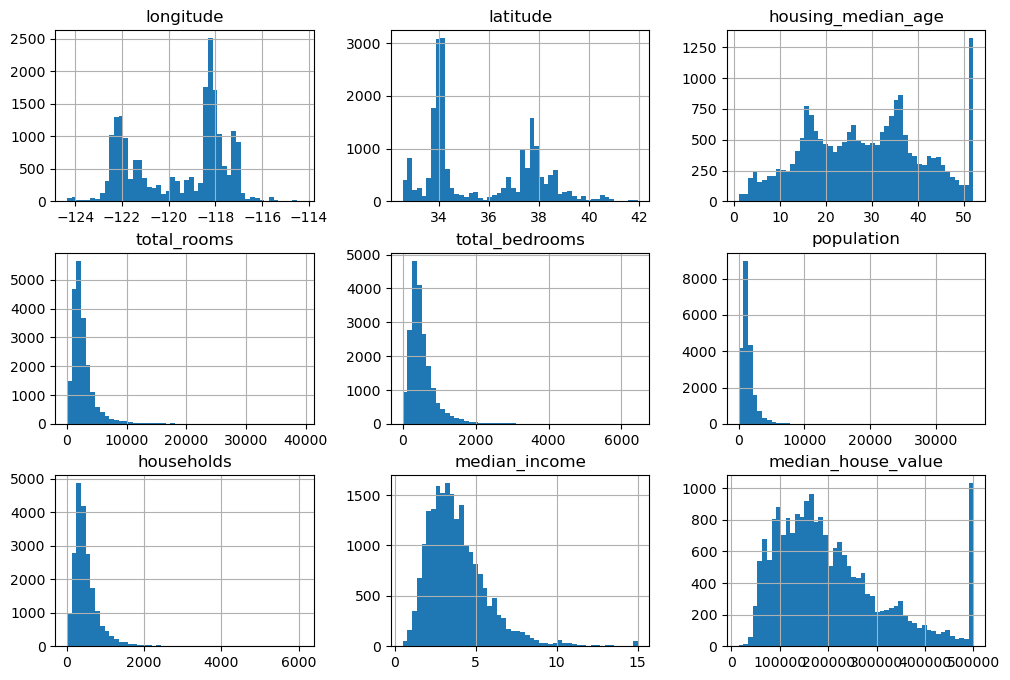

In [8]:
housing.hist(bins=50, figsize=(12,8)) # create histograms for each numerical attribute in the DataFrame with 50 bins and a figure size of 12x8 inches
plt.show() # display the histograms

From reviewing these histograms it is clear that - 

1. median_income is not expressed in $ amounts - this is actually a scaled and capped range with the numbers meaning "10's of thousands" therefore 5 would be $50,000 and 10 would be $100,000
2. housing_median_age and median_house_value are also capped - this is an issue as median_house_value is going to be the target attribute.
3. Many of the hostograms are on different scales.

Splitting the data into training and testing sets with conventional parameter of 20% random selection for the test set is good, but it runs the risk of introducing a sampling bias as random (i.e. there is a chance that higher median incomes may be randomly over represented).

Stratified sampling allows for the data set to be split into representative strata and the right number of instances taken from each strata to make up the test set and to ensure the test data is truly representative of the original data set.


<h4><strong>Stratified sampling for Train / Test split</strong></h4>

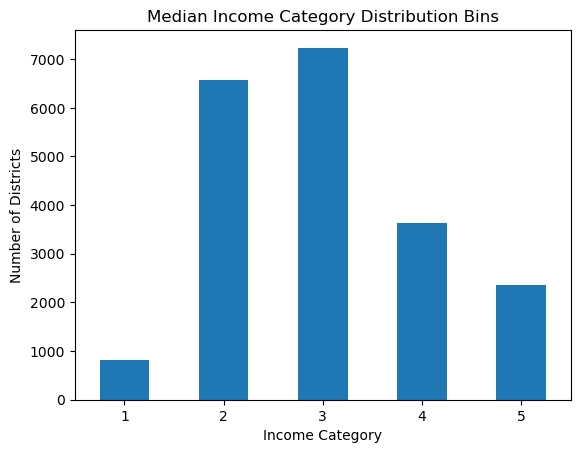

In [9]:

import numpy as np # import the numpy library for numerical operations
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # import StratifiedShuffleSplit and train_test_split from sklearn.model_selection for data splitting

housing["income_cat"] = pd.cut(housing["median_income"], # first the category " bins" are created based on median income - in this instance a new feature is made and median income is divided into 5 categories
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]) # create income categories for stratified sampling

housing["income_cat"].value_counts().sort_index().plot(kind="bar", rot=0) # display bar chart of the created income categories
plt.xlabel("Income Category") # label x-axis
plt.ylabel("Number of Districts") # label y-axis    
plt.title("Median Income Category Distribution Bins") # title of the histogram
plt.show() # display the histogram


In [10]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"]) # split the data into stratified training and test sets based on income categories

<h4><strong>Validating the stratified split</strong></h4>

In [11]:
print("Test set income category proportions:")
print(strat_test_set["income_cat"].value_counts(normalize=True).sort_index()) # display the proportions of income categories in the test set
print(f"\nTotal values in test set : {len(strat_test_set)}")
print("\nTrain set income category proportions:")
print(strat_train_set["income_cat"].value_counts(normalize=True).sort_index()) # display the proportions of income categories in the training set
print(f"\nTotal values in train set : {len(strat_train_set)}")

Test set income category proportions:
income_cat
1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: proportion, dtype: float64

Total values in test set : 4128

Train set income category proportions:
income_cat
1    0.039789
2    0.318859
3    0.350594
4    0.176296
5    0.114462
Name: proportion, dtype: float64

Total values in train set : 16512


In [12]:
for set_ in (strat_train_set, strat_test_set): # remove the income_cat attribute so the data is back to its original state (we retain the test / train split)
    set_.drop("income_cat", axis=1, inplace=True)

<h4><strong>Explorative visualisations</strong></h4>

As the data set includes geographic data, it's helpful to visualise this.

<Axes: xlabel='longitude', ylabel='latitude'>

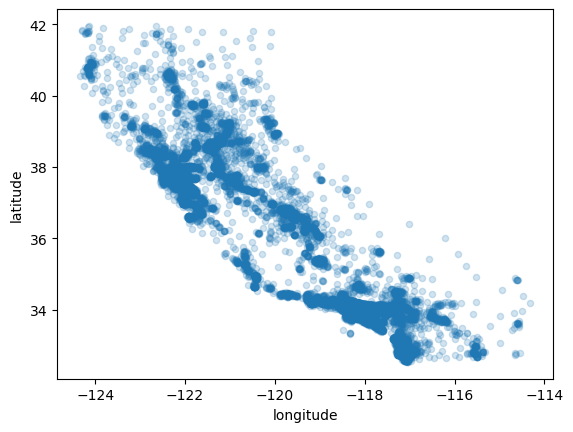

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2) # create a scatter plot of the housing data based on geographical coordinates with low opacity for better visibility

This can be enhanced further by adding more details such as population and median house value.

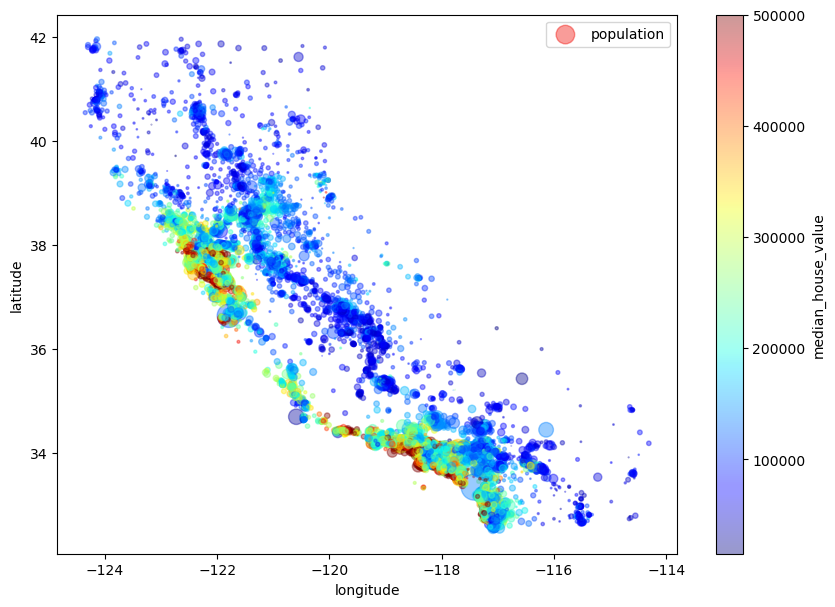

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude",
            s = housing["population"] / 100, label = "population", # set point size based on population
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, alpha=0.4, # set point color based on median house value
            legend=True, # display legend
            figsize=(10,7)) # set figure size
plt.show() 

This indicates that housing prices are higher near the coast and in certain areas inland.

The next visualistion is a correlation check to identify which attributes positively / negatively correlate to "nedian_house_value" (range is -1 to 1 with closer to 1 being a strong positive correlation and closer to -1 being a strong negative correlation)

In [17]:
# drop categorical attribute for correlation analysis
housing_numeric = housing.drop("ocean_proximity", axis=1) # create a new DataFrame without the ocean_proximity column for correlation analysis
corr_matrix = housing_numeric.corr() # compute the correlation matrix for the DataFrame

corr_matrix["median_house_value"].sort_values(ascending=False) # display the correlation of each attribute with median_house_value, sorted in descending order

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

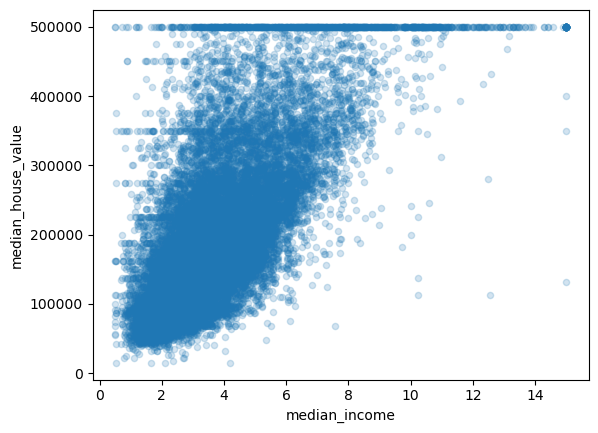

In [19]:
# this shows that median_income has the highest correlation with median_house_value and can also be seen in a scatter plot

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2) # create a scatter plot of median_income vs median_house_value with low opacity for better visibility